In [1]:
import sys
sys.path.append("/Users/rohanramesh/Documents/GitHub/Basketball_predictions/lib/")
import pickle
import numpy as np
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import get_player_team_data as ptd

# Data exploration and plotting

This jupyter notebook is not designed for any final analysis, but rather to explore and get a handle on the data sets for individual players. Specifically, I want to get a sense for how correlated individual stats are with each other

In [8]:
# load in single player stats
with open('/Users/rohanramesh/Documents/SportsData/NBA/YearlyBasicData.pickle', 'rb') as handle:
    Yearly_df = pickle.load(handle)

with open('/Users/rohanramesh/Documents/SportsData/NBA/YearlyAdvData.pickle', 'rb') as handle:
    Yearly_df_adv = pickle.load(handle)

with open('/Users/rohanramesh/Documents/SportsData/NBA/Yearly100possData.pickle', 'rb') as handle:
    Yearly_df_100pos = pickle.load(handle)
    
with open('/Users/rohanramesh/Documents/SportsData/NBA/AllYearlyData_2008_2018.pickle', 'rb') as handle:
    df_all_stats = pickle.load(handle)
    
years_to_use = range(2008,2019)

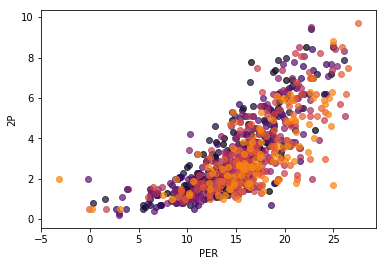

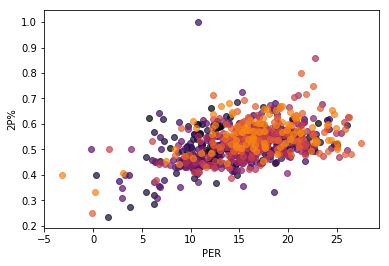

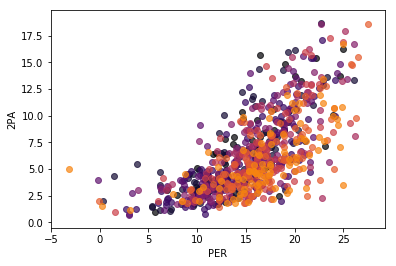

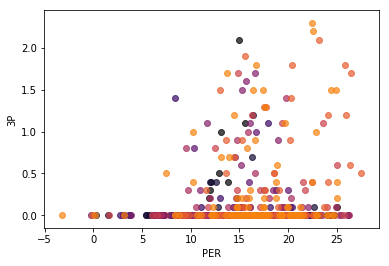

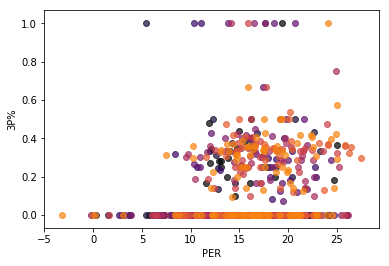

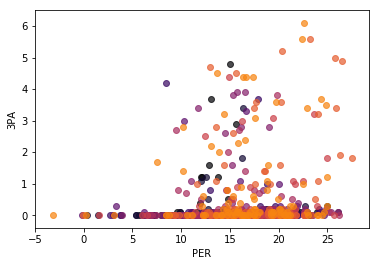

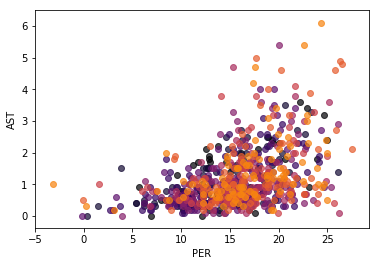

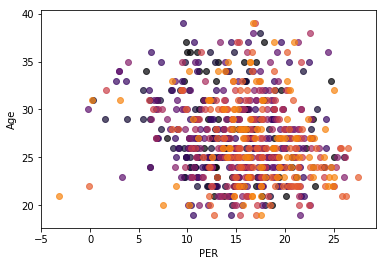

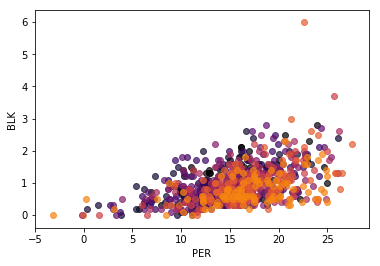

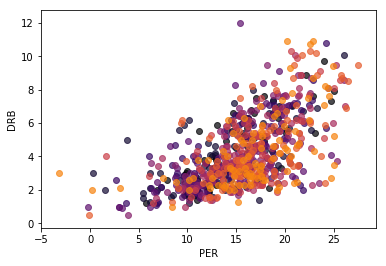

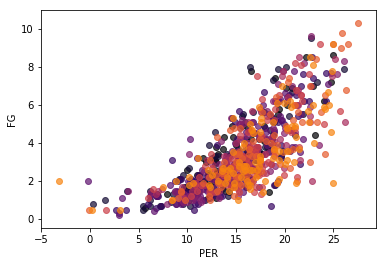

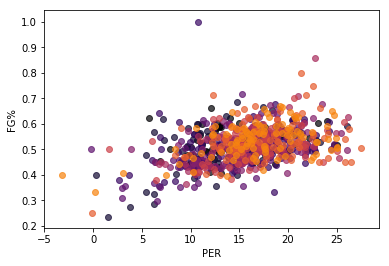

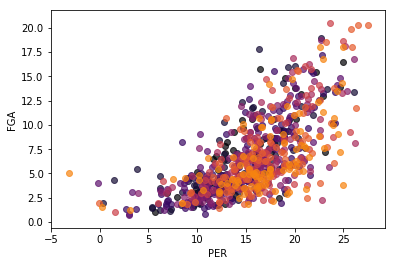

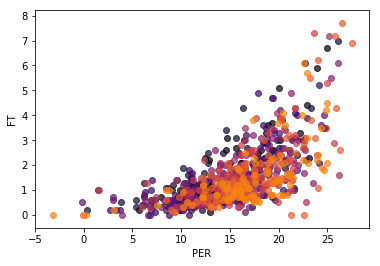

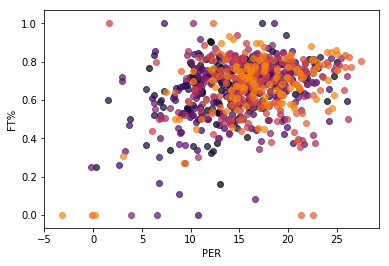

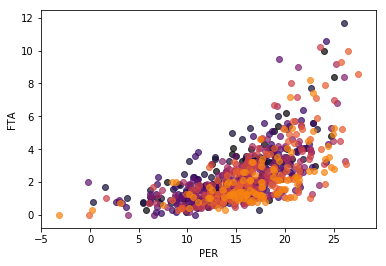

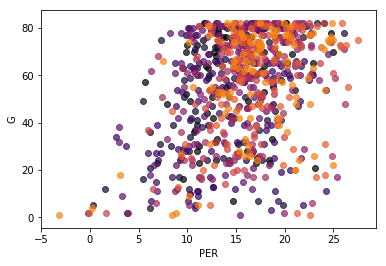

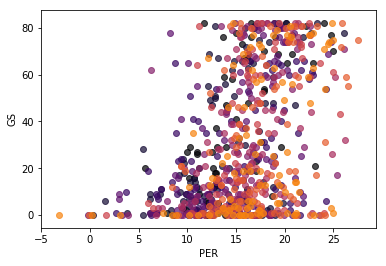

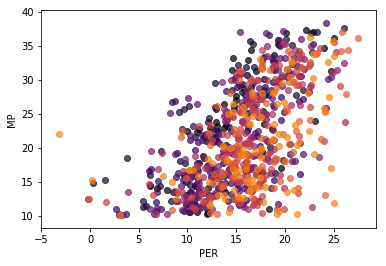

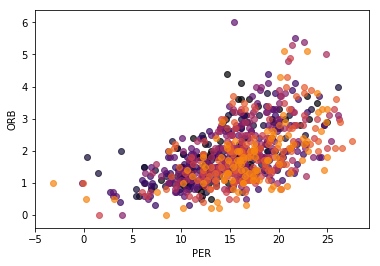

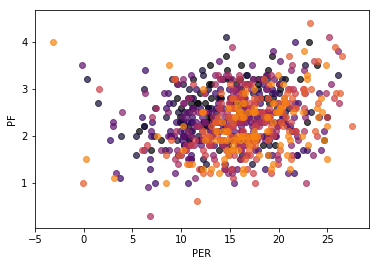

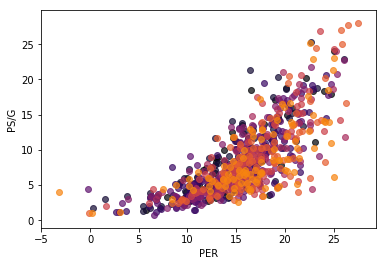

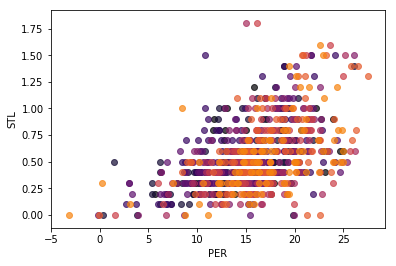

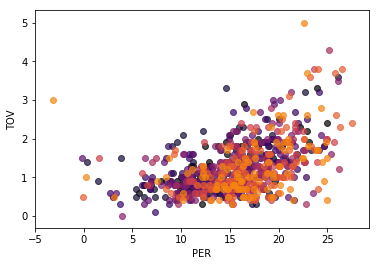

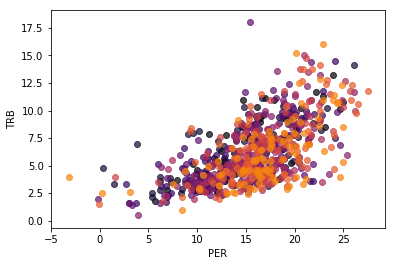

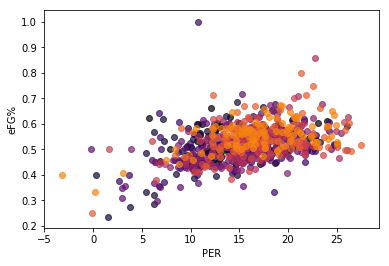

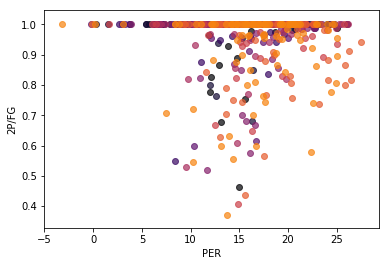

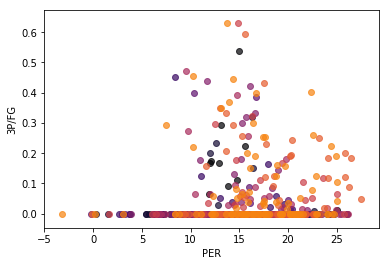

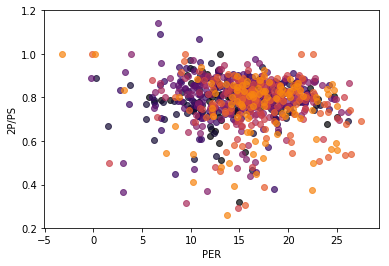

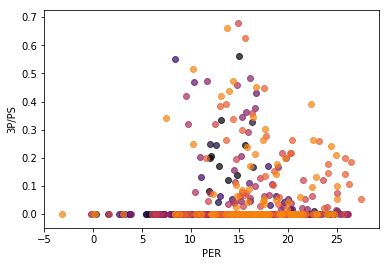

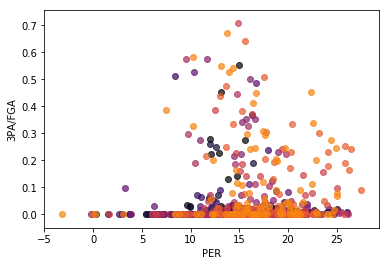

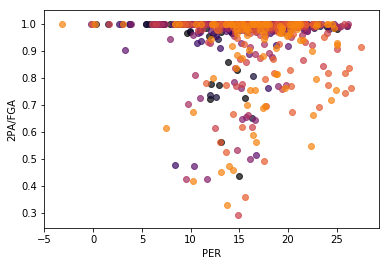

In [3]:
# Quick visualization so can take a look at the data and get a sense for what we are dealing with
cm = plt.get_cmap('inferno',len(range(2010,2019))+3)
# lets get all headers that are numeric
curr_header = list(Yearly_df['2018'])
curr_adv_header = list(Yearly_df_adv['2018'])
numeric_headers = [list(Yearly_df['2018'])[i] for i 
                   in range(0,len(curr_header)) if ptd.isfloat(Yearly_df['2018'].iloc[0,i])]
stat_plot_against = 'PER'
for curr_stat in numeric_headers:
    cidx = 0
    for curr_year in range(2010,2019):
        idx = (Yearly_df[str(curr_year)]['Pos'] == 'C') & (Yearly_df[str(curr_year)]['MP'] > 10)
        curr_vec = Yearly_df[str(curr_year)][curr_stat][idx]
        curr_vec2 = Yearly_df_adv[str(curr_year)][stat_plot_against][idx]  
        plt.scatter(curr_vec2,curr_vec,c=cm.colors[cidx],alpha=0.7)
        plt.xlabel(stat_plot_against)
        plt.ylabel(curr_stat)
        cidx+=1
    plt.show()

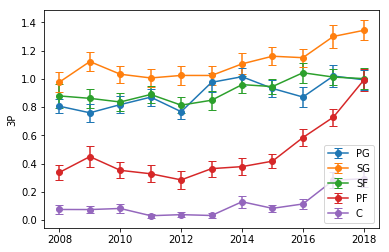

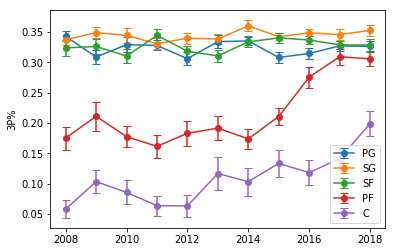

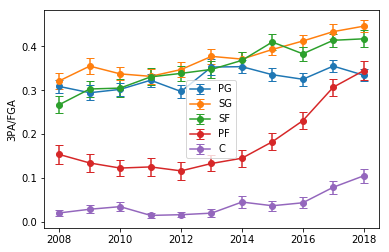

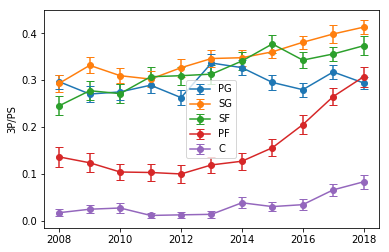

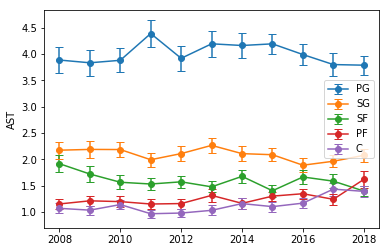

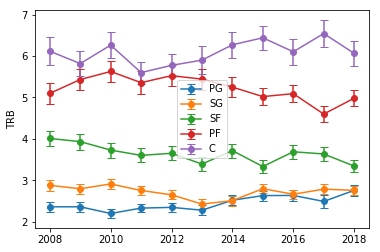

In [7]:
# lets make a plot for any given category and just show it change across years for all positions
stats_plot_across_years = ['3P', '3P%', '3PA/FGA', '3P/PS', 'AST', 'TRB']
for curr_stat in stats_plot_across_years:
    pos_list = ['PG', 'SG', 'SF', 'PF', 'C']
    for curr_pos in pos_list:
        curr_mean = []
        curr_sem = []
        for curr_year in years_to_use:
            idx = (Yearly_df[str(curr_year)]['Pos'] == curr_pos) & (Yearly_df[str(curr_year)]['MP'] > 10)
            curr_vec = Yearly_df[str(curr_year)][curr_stat][idx]
            curr_mean.append(np.nanmean(curr_vec))
            curr_sem.append(stats.sem(curr_vec,nan_policy='omit'))
        plt.errorbar(years_to_use,curr_mean,curr_sem,marker='o',capsize=4)
    plt.legend(pos_list,loc='best')
    plt.ylabel(curr_stat)
    plt.show()


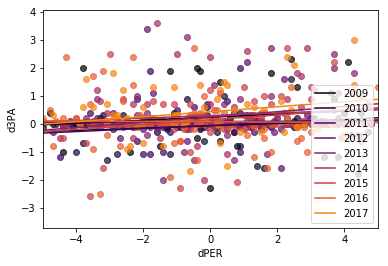

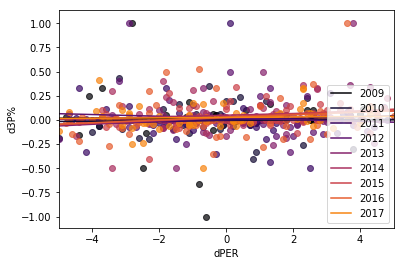

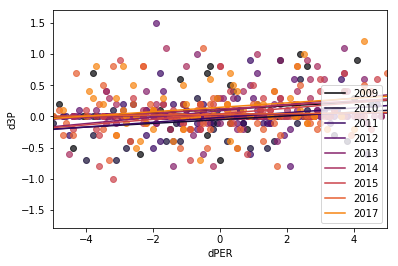

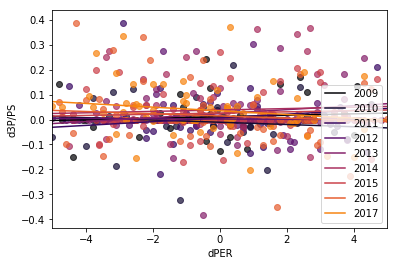

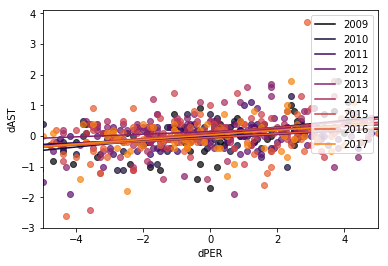

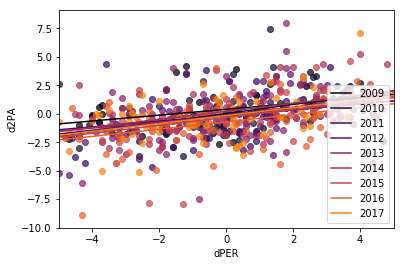

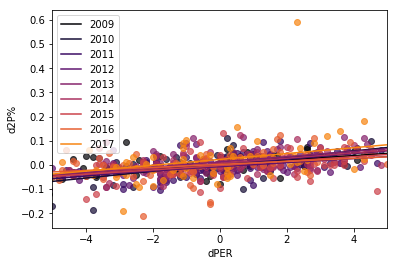

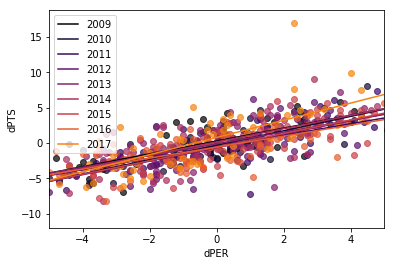

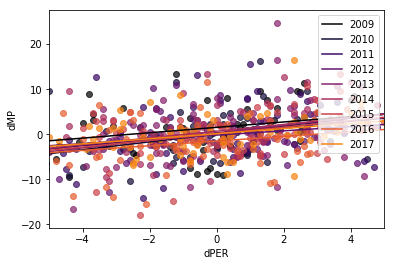

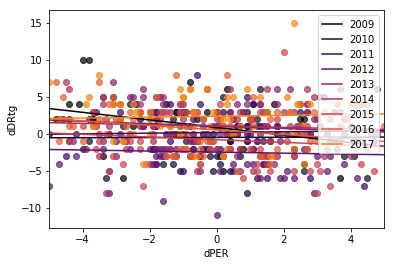

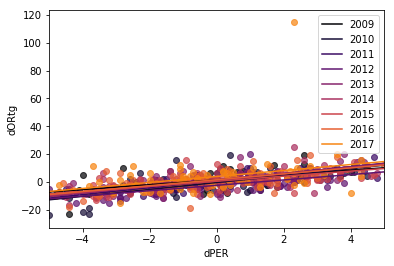

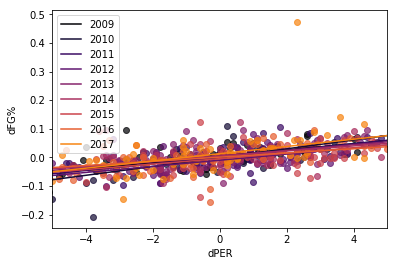

In [9]:
# Plot one change in stats vs. another to see if any are correlated
cm = plt.get_cmap('inferno',len(range(2010,2019))+3)
numeric_headers = ['d3PA','d3P%','d3P','d3P/PS','dAST','d2PA','d2P%','dPTS','dMP','dDRtg','dORtg','dFG%']
stat_plot_against = 'dPER'
years_string = ["{:02d}".format(x) for x in years_to_use[1:-1]]
for curr_stat in numeric_headers:
    cidx = 0
    for curr_year in years_to_use[1:-1]:
        # players to consider
        criterion = (df_all_stats[str(curr_year)]['MP_adv'] > 250) & (df_all_stats[str(curr_year)]['Pos'] == 'PF')
        output1 = df_all_stats[str(curr_year)][curr_stat][criterion]
        output2 = df_all_stats[str(curr_year)][stat_plot_against][criterion]
        output2 = output2.as_matrix()
        output1 = output1.as_matrix()
        idx_nonnan = ~np.isnan(output2) & ~np.isnan(output1)
        output2 = output2[idx_nonnan]
        output1 = output1[idx_nonnan]
        slope, intercept, r_value, p_value, std_err = stats.linregress(output2,output1)
        plt.scatter(output2,output1,c=cm.colors[cidx],alpha=0.7)
        # for best fit line
        x_vals = np.array(plt.gca().get_xlim())
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals, '-',color=cm.colors[cidx])
        plt.xlabel(stat_plot_against)
        plt.ylabel(curr_stat)
        # set xlim
        plt.xlim((-5, 5))
        cidx+=1
    plt.legend(years_string,loc='best')
    plt.show()
